In [1]:
import pandas as pd
import numpy as np

In [3]:
graduate = pd.read_excel('synthetic graduate data jupyter.xlsx')
school = pd.read_excel('synthetic ss3 data jupyter.xlsx')

In [5]:
graduate

,Timestamp,Age,Gender,Class_Study,Residence_Type,Commute_Time,Parent_Income_Level,Sibling_Count,Parent_Education_Level,Gadget_Ownership,...,Exam_Confidence,School_Motivation,Resumed_Tertiary_Institution_Type,Admission_Chance_with_JAMB_Score,JAMB_Influence_on_Institution_Change,Used_Two_Results_for_Admission,JAMB_Score,NECO_Result,WAEC_Result,Career_Path_Interest
0,2024-10-05 13:10:53.029,18,Female,Commercial,Suburb,69.0,"100,000 - 250,000",0,Secondary education,Phone,...,Very confident,Stay in school,College Of Education,no,no,waec,253,I haven't received my NECO result,I haven't received my WAEC result,Computer Science
1,2024-10-04 13:10:53.029,16,Female,Commercial,Rural,30.0,"100,000 - 250,000",4,Primary education,Tablet,...,Somewhat confident,Future career goals,University,yes,yes,no,236,I did not write NECO,I haven't received my WAEC result,Architecture
2,2024-10-03 13:10:53.029,17,Male,Commercial,Suburb,49.0,"More than 500,000",4,Primary education,Laptop,...,Not confident,Future career goals,Technical School,yes,no,neco,261,Fair,Good,Medicine
3,2024-10-02 13:10:53.029,17,Male,Commercial,Rural,57.0,"250,000 - 500,000",0,NaN,Other,...,Not confident,Stay in school,Polytechnic,yes,no,neco,159,I haven't received my NECO result,Good,Law
4,2024-10-01 13:10:53.029,16,Female,Science,Suburb,77.0,"100,000 - 250,000",2,Secondary education,Phone,...,Not confident,Get good grades,Polytechnic,yes,no,neco,251,Excellent,Poor,Business Administration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2024-10-03 18:54:33.000,22,Male,Commercial,Suburb,30.0,"Less than 50,000",7,Primary education,NaN,...,Very confident,Determination,University,No,No,No,200,Good,Good,Economics
136,2024-10-03 19:26:26.000,15,Male,Science,Suburb,15.0,"250,000 - 500,000",5,Tertiary education,NaN,...,Very confident,Satisfy parents,University,Yes,Yes,No,283,I did not write NECO,Excellent,Medicine
137,2024-10-03 22:02:23.000,16,Female,Science,Suburb,10.0,"50,000 - 100,000",2,Secondary education,Phone,...,NaN,Satisfy parents,No,Yes,No,waec,215,I haven't received my NECO result,Excellent,Medicine
138,2024-10-03 22:38:48.000,15,Male,Science,Urban,4.0,"50,000 - 100,000",3,Tertiary education,Phone,...,Somewhat confident,Nothing,No,Yes,Yes,No,239,Fair,Good,engineering


In [11]:
graduate['Residence_Type'] = graduate['Residence_Type'].str.strip()

In [15]:
graduate['Extracurricular_Activity_Club'] = graduate['Extracurricular_Activity_Club'].str.replace(r'\bclub\b', '', regex=True).str.strip()


In [17]:
graduate['Exam_Type_Preference_CBT_vs_NonCBT'] = graduate['Exam_Type_Preference_CBT_vs_NonCBT'].str.replace('Non-CBT', 'NonCBT')

In [21]:
# List of columns to standardize
columns_to_standardize = ['Library_Access', 'Internet_Access', 'PreJAMB_CBT_Test',
                          'Computer_Studies_Offered', 'Private_Tutor_Access', 
                          'Prefect_Status', 'Repeated_Grade', 
                          'Extracurricular_Participation', 
                          'Admission_Chance_with_JAMB_Score', 
                          'JAMB_Influence_on_Institution_Change']

# Converting values to lowercase for consistency ('yes' and 'no')
graduate[columns_to_standardize] = graduate[columns_to_standardize].apply(lambda x: x.str.lower())

In [25]:
# Standardize the 'Used_Two_Results_for_Admission' column in the graduate DataFrame
graduate['Used_Two_Results_for_Admission'] = graduate['Used_Two_Results_for_Admission'].str.strip().str.lower()

# Replace all variations of 'waec' and 'neco' with 'no'
graduate['Used_Two_Results_for_Admission'] = graduate['Used_Two_Results_for_Admission'].replace(['waec', 'neco', 'waecs'], 'no')

# Replace 'bo' with 'yes'
graduate['Used_Two_Results_for_Admission'] = graduate['Used_Two_Results_for_Admission'].replace('bo', 'yes')

# Verify the unique values after replacements
graduate['Used_Two_Results_for_Admission'].unique()


array(['no', 'yes'], dtype=object)

In [33]:
graduate['Career_Path_Interest'] = graduate['Career_Path_Interest'].str.strip().str.lower()

In [89]:
# Clean up and standardize the 'Extracurricular_Activity_Club' column

def clean_club(club):
    if pd.isna(club):
        return club
    club = club.lower()  # Convert to lowercase
    club = club.replace('club', '').strip()  # Remove the word 'club' and strip whitespace
    
    # Standardize similar clubs
    if 'debate' in club or 'literary' in club:
        return 'debate and literary'
    elif 'jet' in club:
        return 'jet'
    elif 'sport' in club:
        return 'sports'
    elif 'red cross' in club:
        return 'red cross'
    elif 'french' in club:
        return 'french'
    elif 'press' in club:
        return 'press'
    elif 'soccer' in club or 'football' in club:
        return 'sports'
    
    return club  # Return the cleaned club name

# Apply the function to the column
graduate['Extracurricular_Activity_Club'] = graduate['Extracurricular_Activity_Club'].apply(clean_club)

# Verify the unique values after the cleanup
graduate['Extracurricular_Activity_Club'].unique()


C:\Users\DELL\AppData\Local\Temp\ipykernel_27708\3057515861.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduate['Extracurricular_Activity_Club'] = graduate['Extracurricular_Activity_Club'].apply(clean_club)


array(['debate and literary', 'sports', 'art', 'other', 'choir', 'drama',
       'cultural dance', 'science', 'music', 'french', 'press', 'none',
       'red cross', 'young farmers', 'jet', 'home makers'], dtype=object)

array(['stay in school', 'better future', 'get good grades',
       'satisfy parents', 'pursue higher education', 'pass exams',
       'my classmates', 'myself', 'nothing', 'curiosity', 'pride',
       'determination', 'passion to study', 'get out of that place'],
      dtype=object)

In [91]:
graduate.isna().sum()

Timestamp                               0
Age                                     0
Gender                                  0
Class_Study                             0
Residence_Type                          0
Commute_Time                            0
Parent_Income_Level                     0
Sibling_Count                           0
Parent_Education_Level                  0
Gadget_Ownership                        0
Guardian_Academic_Involvement           0
Library_Access                          0
Internet_Access                         0
Study_Environment_Rating                0
Computer_Studies_Offered                0
Private_Tutor_Access                    0
Prefect_Status                          0
Teacher_Availability                    0
Extracurricular_Participation           0
Extracurricular_Activity_Club           0
PreJAMB_CBT_Test                        0
Exam_Type_Preference_CBT_vs_NonCBT      0
Repeated_Grade                          0
Study_Hours_Per_Day               

In [51]:
# Replace missing values with 'None' for the specified columns
graduate['Parent_Education_Level'] = graduate['Parent_Education_Level'].fillna('None')
graduate['Gadget_Ownership'] = graduate['Gadget_Ownership'].fillna('None')
graduate['Extracurricular_Activity_Club'] = graduate['Extracurricular_Activity_Club'].fillna('None')

# Verify the missing values have been filled
graduate[['Parent_Education_Level', 'Gadget_Ownership', 'Extracurricular_Activity_Club']].isnull().sum()


Parent_Education_Level           0
Gadget_Ownership                 0
Extracurricular_Activity_Club    0
dtype: int64

In [53]:
graduate.isna().sum()

Timestamp                               0
Age                                     0
Gender                                  0
Class_Study                             0
Residence_Type                          0
Commute_Time                            1
Parent_Income_Level                     0
Sibling_Count                           0
Parent_Education_Level                  0
Gadget_Ownership                        0
Guardian_Academic_Involvement           0
Library_Access                          0
Internet_Access                         0
Study_Environment_Rating                0
Computer_Studies_Offered                0
Private_Tutor_Access                    0
Prefect_Status                          0
Teacher_Availability                    0
Extracurricular_Participation           0
Extracurricular_Activity_Club           0
PreJAMB_CBT_Test                        0
Exam_Type_Preference_CBT_vs_NonCBT      0
Repeated_Grade                          0
Study_Hours_Per_Day               

In [59]:
graduate['Parent_Education_Level'].unique()

array(['Secondary education', 'Primary education', 'None',
       'Tertiary education'], dtype=object)

In [57]:
graduate = graduate.dropna()


In [93]:
unique_ = {column: school[column].unique() for column in school.columns}
unique_

{'Timestamp': <DatetimeArray>
 ['2024-10-05 13:09:53.199000', '2024-10-04 13:09:53.199000',
  '2024-10-03 13:09:53.199000', '2024-10-02 13:09:53.199000',
  '2024-10-01 13:09:53.199000', '2024-09-30 13:09:53.199000',
  '2024-09-29 13:09:53.199000', '2024-09-28 13:09:53.199000',
  '2024-09-27 13:09:53.199000', '2024-09-26 13:09:53.199000',
  ...
  '2024-06-29 13:09:53.199000', '2024-06-28 13:09:53.199000',
         '2024-10-02 13:55:47',        '2024-10-02 19:36:52',
         '2024-10-03 07:21:38',        '2024-10-03 07:49:34',
         '2024-10-03 08:19:30',        '2024-10-03 08:36:32',
         '2024-10-03 10:04:28',        '2024-10-03 11:10:55']
 Length: 108, dtype: datetime64[ns],
 'Age': array([14, 15, 13, 16, 17, 24, 21], dtype=int64),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Class_Study': array(['Science', 'Commercial', 'Art'], dtype=object),
 'Residence_Type': array(['Urban', 'Rural', 'Suburb'], dtype=object),
 'Commute_Time': array([61, 40, 39, 71, 24, 72, 80, 38, 

In [63]:
school['Residence_Type'] = school['Residence_Type'].str.strip()

In [69]:
# List of columns to standardize
columns_to_standardize = ['Library_Access', 'Internet_Access', 'PreJAMB_CBT_Test',
                          'Computer_Studies_Offered', 'Private_Tutor_Access', 
                          'Prefect_Status', 'Repeated_Grade', 
                          'Extracurricular_Participation']

# Converting values to lowercase for consistency ('yes' and 'no')
school[columns_to_standardize] = school[columns_to_standardize].apply(lambda x: x.str.lower())

In [71]:
school['Career_Path_Interest'] = school['Career_Path_Interest'].str.strip().str.lower()

In [75]:
school['Higher_Education_Plan'] = school['Higher_Education_Plan'].str.lower()

In [79]:
# Define a function to clean and standardize the 'School_Motivation' column
def clean_motivation(motivation):
    if pd.isna(motivation):
        return motivation
    motivation = motivation.strip().lower()  # Remove extra spaces and convert to lowercase
    
    # Standardize similar motivations
    if 'good grades' in motivation:
        return 'get good grades'
    elif 'future' in motivation:
        return 'future career goals'
    elif 'money' in motivation:
        return 'money'
    elif 'successful' in motivation:
        return 'to be successful in life'
    elif 'parents' in motivation:
        return 'satisfy parents'
    elif 'exams' in motivation:
        return 'pass exams'
    elif 'higher education' in motivation:
        return 'pursue higher education'
    elif 'teaching' in motivation:
        return 'the teaching in the school'
    elif 'passion' in motivation:
        return 'my passion to learn'
    
    return motivation  # Return cleaned motivation

# Apply the function to the 'School_Motivation' column
school['School_Motivation'] = school['School_Motivation'].apply(clean_motivation)

# Verify the unique values after cleanup
print(school['School_Motivation'].unique())


['stay in school' 'money' 'get good grades' 'future career goals'
 'pass exams' 'satisfy parents' 'pursue higher education'
 'to be successful in life' 'the teaching in the school'
 'my passion to learn']


In [81]:
school['Extracurricular_Activity_Club'] = school['Extracurricular_Activity_Club'].str.replace(r'\bclub\b', '', regex=True).str.strip()


In [83]:
import pandas as pd
import numpy as np

def clean_extracurricular_activities(school):
    def clean_activity(activity):
        if pd.isna(activity):
            return np.nan
        
        # Convert to lowercase and remove 'club'
        activity = activity.lower().replace('club', '').strip()
        
        # Standardize similar activities
        if activity in ['jet', 'jets']:
            return 'jet'
        elif activity in ['debate', 'debate and literary', 'literary', 'literary and debate']:
            return 'debate and literary'
        elif activity in ['sport', 'sports', 'soccer', 'football', 'Football']:
            return 'sports'
        elif activity in ['red cross', 'red_cross']:
            return 'red cross'
        elif activity in ['press', 'press_club']:
            return 'press'
        elif activity in ['young farmers', 'young_farmers']:
            return 'young farmers'
        elif activity == 'none':
            return np.nan
        else:
            return activity

    school['Extracurricular_Activity_Club'] = school['Extracurricular_Activity_Club'].apply(clean_activity)
    return school

In [87]:
# Clean up and standardize the 'Extracurricular_Activity_Club' column

def clean_club(club):
    if pd.isna(club):
        return club
    club = club.lower()  # Convert to lowercase
    club = club.replace('club', '').strip()  # Remove the word 'club' and strip whitespace
    
    # Standardize similar clubs
    if 'debate' in club or 'literary' in club:
        return 'debate and literary'
    elif 'jet' in club:
        return 'jet'
    elif 'sport' in club:
        return 'sports'
    elif 'red cross' in club:
        return 'red cross'
    elif 'french' in club:
        return 'french'
    elif 'press' in club:
        return 'press'
    elif 'soccer' in club or 'football' in club:
        return 'sports'
    
    return club  # Return the cleaned club name

# Apply the function to the column
school['Extracurricular_Activity_Club'] = school['Extracurricular_Activity_Club'].apply(clean_club)

# Verify the unique values after the cleanup
school['Extracurricular_Activity_Club'].unique()


array(['science', 'choir', 'sports', 'drama', 'other', 'young farmers',
       'debate and literary', 'jet', 'none', 'press', 'music', 'art',
       'red cross', 'french', 'cultural dance', nan], dtype=object)

In [99]:
school.isna().sum()

Timestamp                        0
Age                              0
Gender                           0
Class_Study                      0
Residence_Type                   0
Commute_Time                     0
Parent_Income_Level              0
Sibling_Count                    0
Parent_Education_Level           0
Gadget_Ownership                 0
Guardian_Academic_Involvement    0
Library_Access                   0
Internet_Access                  0
Study_Environment_Rating         0
Computer_Studies_Offered         0
Private_Tutor_Access             0
Prefect_Status                   0
Teacher_Availability             0
Extracurricular_Participation    0
Extracurricular_Activity_Club    0
PreJAMB_CBT_Test                 0
Repeated_Grade                   0
Study_Hours_Per_Day              0
Exam_Preparation_Challenges      0
Exam_Confidence                  0
Career_Path_Interest             0
Higher_Education_Plan            0
School_Motivation                0
dtype: int64

In [97]:
# Replace missing values with 'None' for the specified columns
school['Parent_Education_Level'] = school['Parent_Education_Level'].fillna('None')
school['Gadget_Ownership'] = school['Gadget_Ownership'].fillna('None')
school['Extracurricular_Activity_Club'] = school['Extracurricular_Activity_Club'].fillna('None')

# Verify the missing values have been filled
school[['Parent_Education_Level', 'Gadget_Ownership', 'Extracurricular_Activity_Club']].isnull().sum()


Parent_Education_Level           0
Gadget_Ownership                 0
Extracurricular_Activity_Club    0
dtype: int64

In [101]:
school

,Timestamp,Age,Gender,Class_Study,Residence_Type,Commute_Time,Parent_Income_Level,Sibling_Count,Parent_Education_Level,Gadget_Ownership,...,Extracurricular_Participation,Extracurricular_Activity_Club,PreJAMB_CBT_Test,Repeated_Grade,Study_Hours_Per_Day,Exam_Preparation_Challenges,Exam_Confidence,Career_Path_Interest,Higher_Education_Plan,School_Motivation
0,2024-10-05 13:09:53.199,14,Male,Science,Urban,61,"Less than 50,000",3,None,Other,...,yes,science,no,yes,1,Poor learning environment,Very confident,pharmacy,yes,stay in school
1,2024-10-04 13:09:53.199,14,Female,Science,Rural,40,"250,000 - 500,000",2,Primary education,Other,...,no,choir,yes,no,4,Too many distractions,Very confident,engineering,no,stay in school
2,2024-10-03 13:09:53.199,15,Female,Science,Rural,39,"More than 500,000",4,Secondary education,Other,...,yes,sports,yes,no,8,Health issues,Not confident,business administration,yes,money
3,2024-10-02 13:09:53.199,13,Female,Commercial,Suburb,71,"More than 500,000",2,Primary education,Tablet,...,yes,sports,no,no,7,Lack of teacher support,Very confident,agriculture,yes,money
4,2024-10-01 13:09:53.199,13,Female,Commercial,Rural,24,"250,000 - 500,000",4,Tertiary education,Tablet,...,no,sports,no,yes,1,Lack of resources,Very confident,law,yes,get good grades
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2024-10-03 07:49:34.000,16,Female,Science,Suburb,25,"250,000 - 500,000",2,Tertiary education,None,...,no,None,no,no,6,Other,Somewhat confident,medicine,yes,future career goals
104,2024-10-03 08:19:30.000,17,Female,Art,Urban,90,"More than 500,000",3,Tertiary education,Phone,...,yes,french,yes,no,4,Too many distractions,Somewhat confident,language translation and teaching,yes,satisfy parents
105,2024-10-03 08:36:32.000,21,Female,Science,Urban,5,"250,000 - 500,000",6,Tertiary education,Phone,...,yes,red cross,yes,no,6,Too many distractions,Very confident,medical rehabilitation,yes,my passion to learn
106,2024-10-03 10:04:28.000,14,Female,Art,Urban,10,"More than 500,000",2,Tertiary education,Phone,...,yes,debate and literary,yes,no,6,Too many distractions,Very confident,law,yes,future career goals


In [ ]:
graduate['high_performer'] = (df_graduated['JAMB_Score'] > 200).astype(int)

In [103]:
# Create a new column 'Pass_Fail' based on JAMB_Score
graduate['Pass_Fail'] = graduate['JAMB_Score'].apply(lambda x: 'Pass' if x >= 200 else 'Fail')


C:\Users\DELL\AppData\Local\Temp\ipykernel_27708\63257082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduate['Pass_Fail'] = graduate['JAMB_Score'].apply(lambda x: 'Pass' if x >= 200 else 'Fail')


In [105]:
graduate

,Timestamp,Age,Gender,Class_Study,Residence_Type,Commute_Time,Parent_Income_Level,Sibling_Count,Parent_Education_Level,Gadget_Ownership,...,School_Motivation,Resumed_Tertiary_Institution_Type,Admission_Chance_with_JAMB_Score,JAMB_Influence_on_Institution_Change,Used_Two_Results_for_Admission,JAMB_Score,NECO_Result,WAEC_Result,Career_Path_Interest,Pass_Fail
0,2024-10-05 13:10:53.029,18,Female,Commercial,Suburb,69.0,"100,000 - 250,000",0,Secondary education,Phone,...,stay in school,College Of Education,no,no,no,253,I haven't received my NECO result,I haven't received my WAEC result,computer science,Pass
1,2024-10-04 13:10:53.029,16,Female,Commercial,Rural,30.0,"100,000 - 250,000",4,Primary education,Tablet,...,better future,University,yes,yes,no,236,I did not write NECO,I haven't received my WAEC result,architecture,Pass
2,2024-10-03 13:10:53.029,17,Male,Commercial,Suburb,49.0,"More than 500,000",4,Primary education,Laptop,...,better future,Technical School,yes,no,no,261,Fair,Good,medicine,Pass
3,2024-10-02 13:10:53.029,17,Male,Commercial,Rural,57.0,"250,000 - 500,000",0,None,Other,...,stay in school,Polytechnic,yes,no,no,159,I haven't received my NECO result,Good,law,Fail
4,2024-10-01 13:10:53.029,16,Female,Science,Suburb,77.0,"100,000 - 250,000",2,Secondary education,Phone,...,get good grades,Polytechnic,yes,no,no,251,Excellent,Poor,business administration,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2024-10-03 17:44:46.000,16,Male,Science,Rural,210.0,"More than 500,000",3,Tertiary education,None,...,determination,University,yes,no,no,284,Fair,Good,engineering,Pass
135,2024-10-03 18:54:33.000,22,Male,Commercial,Suburb,30.0,"Less than 50,000",7,Primary education,None,...,determination,University,no,no,no,200,Good,Good,economics,Pass
136,2024-10-03 19:26:26.000,15,Male,Science,Suburb,15.0,"250,000 - 500,000",5,Tertiary education,None,...,satisfy parents,University,yes,yes,no,283,I did not write NECO,Excellent,medicine,Pass
138,2024-10-03 22:38:48.000,15,Male,Science,Urban,4.0,"50,000 - 100,000",3,Tertiary education,Phone,...,nothing,No,yes,yes,no,239,Fair,Good,engineering,Pass


In [111]:
graduate['Pass_Fail'] = graduate['Pass_Fail'].replace({'Pass': 1, 'Fail': 0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_27708\251547361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduate['Pass_Fail'] = graduate['Pass_Fail'].replace({'Pass': 1, 'Fail': 0})


In [113]:
graduate

,Timestamp,Age,Gender,Class_Study,Residence_Type,Commute_Time,Parent_Income_Level,Sibling_Count,Parent_Education_Level,Gadget_Ownership,...,School_Motivation,Resumed_Tertiary_Institution_Type,Admission_Chance_with_JAMB_Score,JAMB_Influence_on_Institution_Change,Used_Two_Results_for_Admission,JAMB_Score,NECO_Result,WAEC_Result,Career_Path_Interest,Pass_Fail
0,2024-10-05 13:10:53.029,18,Female,Commercial,Suburb,69.0,"100,000 - 250,000",0,Secondary education,Phone,...,stay in school,College Of Education,no,no,no,253,I haven't received my NECO result,I haven't received my WAEC result,computer science,1
1,2024-10-04 13:10:53.029,16,Female,Commercial,Rural,30.0,"100,000 - 250,000",4,Primary education,Tablet,...,better future,University,yes,yes,no,236,I did not write NECO,I haven't received my WAEC result,architecture,1
2,2024-10-03 13:10:53.029,17,Male,Commercial,Suburb,49.0,"More than 500,000",4,Primary education,Laptop,...,better future,Technical School,yes,no,no,261,Fair,Good,medicine,1
3,2024-10-02 13:10:53.029,17,Male,Commercial,Rural,57.0,"250,000 - 500,000",0,None,Other,...,stay in school,Polytechnic,yes,no,no,159,I haven't received my NECO result,Good,law,0
4,2024-10-01 13:10:53.029,16,Female,Science,Suburb,77.0,"100,000 - 250,000",2,Secondary education,Phone,...,get good grades,Polytechnic,yes,no,no,251,Excellent,Poor,business administration,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2024-10-03 17:44:46.000,16,Male,Science,Rural,210.0,"More than 500,000",3,Tertiary education,None,...,determination,University,yes,no,no,284,Fair,Good,engineering,1
135,2024-10-03 18:54:33.000,22,Male,Commercial,Suburb,30.0,"Less than 50,000",7,Primary education,None,...,determination,University,no,no,no,200,Good,Good,economics,1
136,2024-10-03 19:26:26.000,15,Male,Science,Suburb,15.0,"250,000 - 500,000",5,Tertiary education,None,...,satisfy parents,University,yes,yes,no,283,I did not write NECO,Excellent,medicine,1
138,2024-10-03 22:38:48.000,15,Male,Science,Urban,4.0,"50,000 - 100,000",3,Tertiary education,Phone,...,nothing,No,yes,yes,no,239,Fair,Good,engineering,1


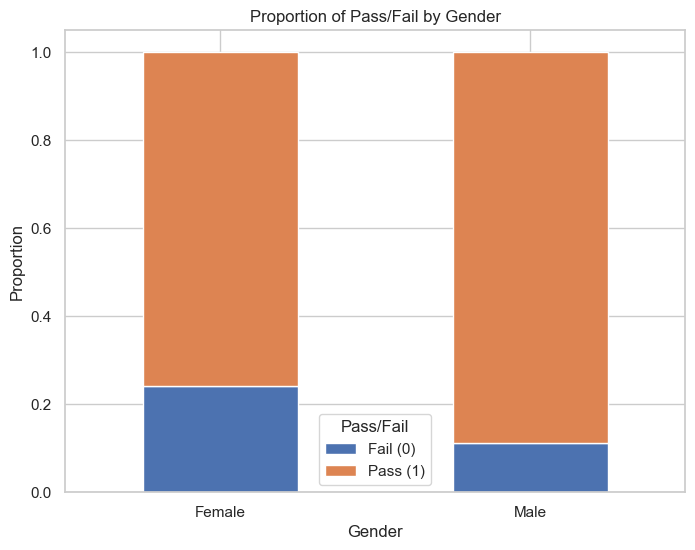

In [121]:

import matplotlib.pyplot as plt
gender_crosstab = pd.crosstab(graduate['Gender'], graduate['Pass_Fail'])

# Normalize the values to get proportions
gender_proportions = gender_crosstab.div(gender_crosstab.sum(axis=1), axis=0)

# Plot the stacked bar chart
gender_proportions.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and title
plt.title('Proportion of Pass/Fail by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Pass/Fail', labels=['Fail (0)', 'Pass (1)'])
plt.show()


<Figure size 1000x600 with 0 Axes>

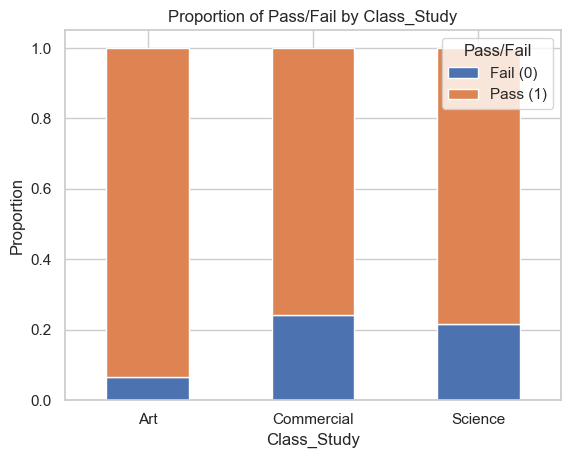

<Figure size 1000x600 with 0 Axes>

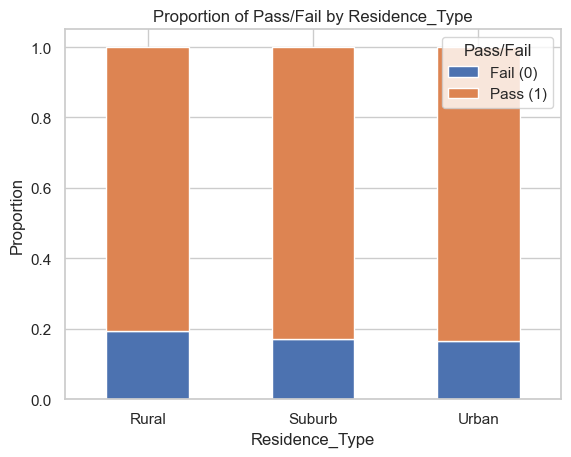

<Figure size 1000x600 with 0 Axes>

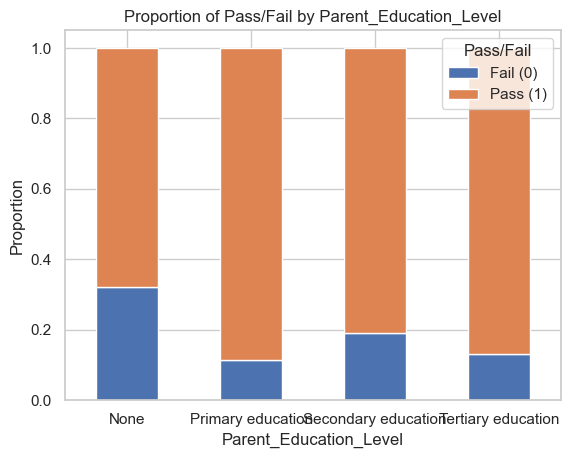

<Figure size 1000x600 with 0 Axes>

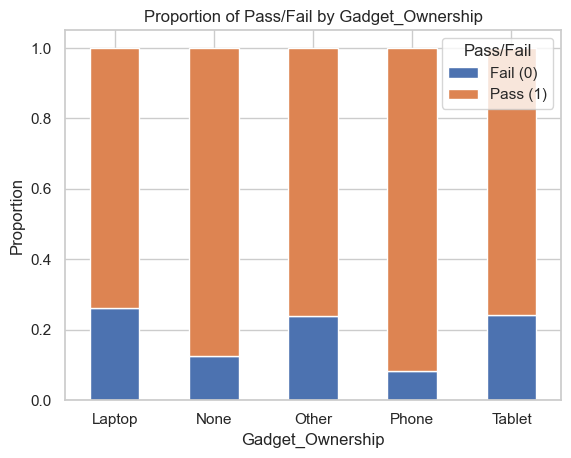

<Figure size 1000x600 with 0 Axes>

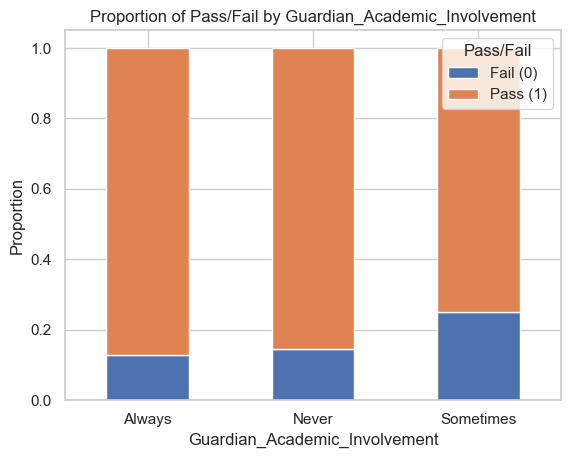

<Figure size 1000x600 with 0 Axes>

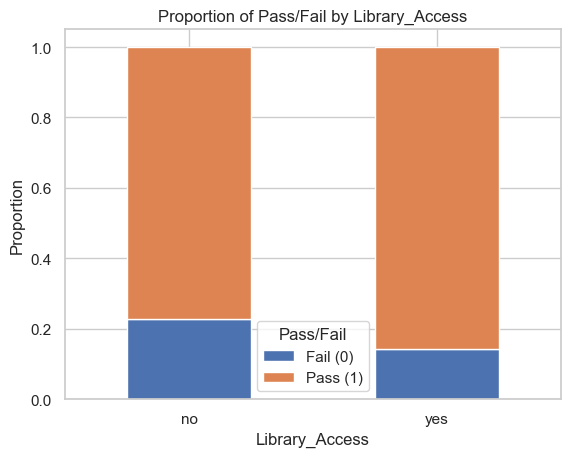

<Figure size 1000x600 with 0 Axes>

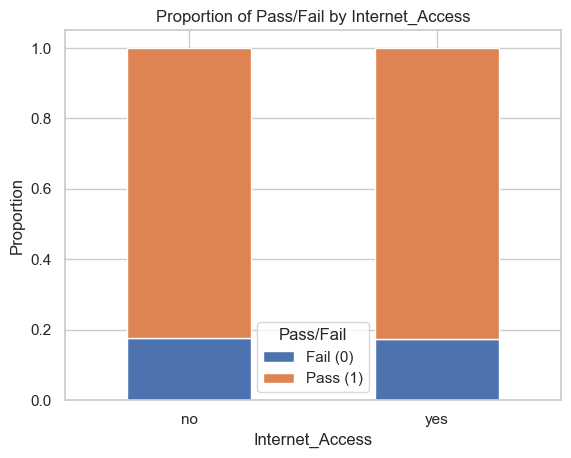

<Figure size 1000x600 with 0 Axes>

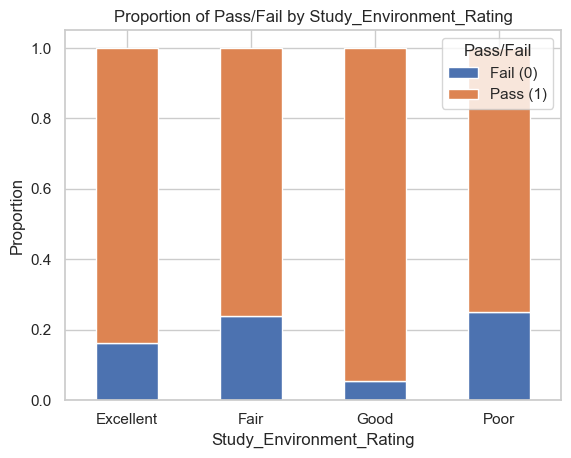

<Figure size 1000x600 with 0 Axes>

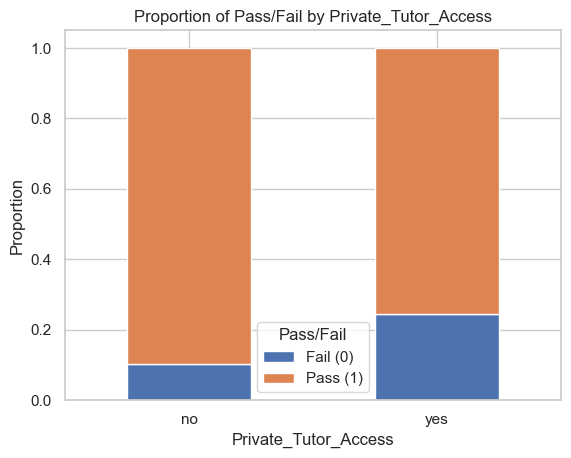

<Figure size 1000x600 with 0 Axes>

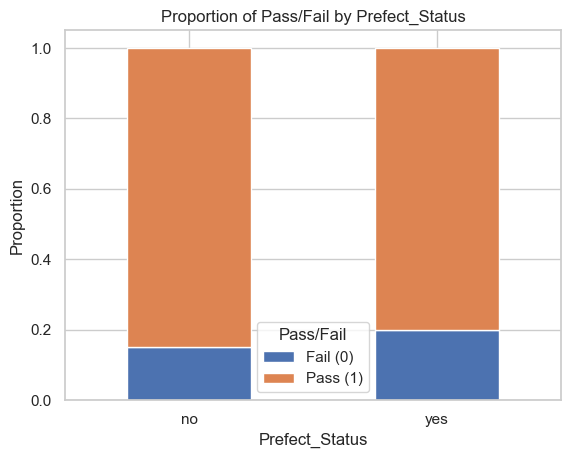

<Figure size 1000x600 with 0 Axes>

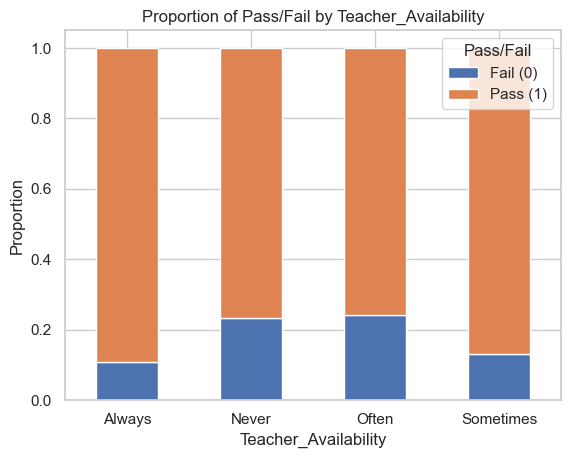

<Figure size 1000x600 with 0 Axes>

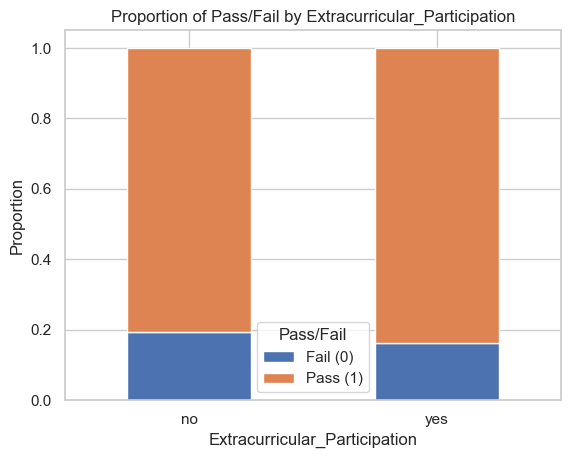

<Figure size 1000x600 with 0 Axes>

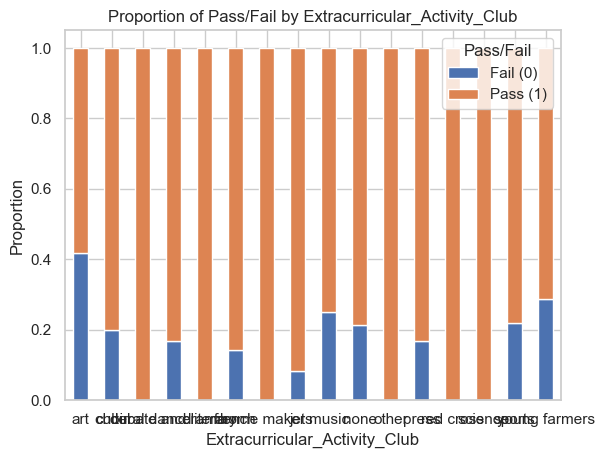

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'graduate' DataFrame is already loaded

# Categorical variables to analyze
categorical_vars = [
    'Class_Study',
    'Residence_Type',
    'Parent_Education_Level',
    'Gadget_Ownership',
    'Guardian_Academic_Involvement',
    'Library_Access',
    'Internet_Access',
    'Study_Environment_Rating',
    'Private_Tutor_Access',
    'Prefect_Status',
    'Teacher_Availability',
    'Extracurricular_Participation',
    'Extracurricular_Activity_Club'
]

# Loop through each categorical variable to create stacked bar plots
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    
    # Create a cross-tabulation
    crosstab = pd.crosstab(graduate[var], graduate['Pass_Fail'])
    
    # Normalize the values to get proportions
    proportions = crosstab.div(crosstab.sum(axis=1), axis=0)
    
    # Plot the stacked bar chart
    proportions.plot(kind='bar', stacked=True)
    
    # Add labels and title
    plt.title(f'Proportion of Pass/Fail by {var}')
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)  # Rotate x labels for better visibility
    plt.legend(title='Pass/Fail', labels=['Fail (0)', 'Pass (1)'])
    
    # Show the plot
    plt.show()


<Figure size 1000x600 with 0 Axes>

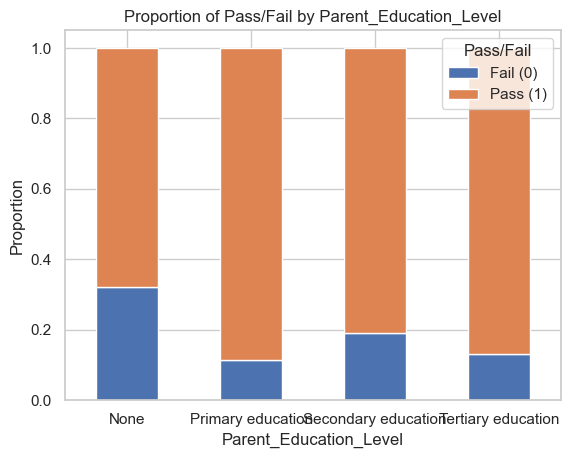

<Figure size 1000x600 with 0 Axes>

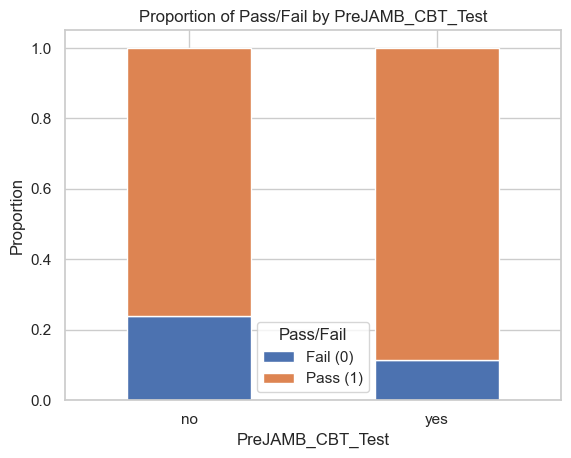

<Figure size 1000x600 with 0 Axes>

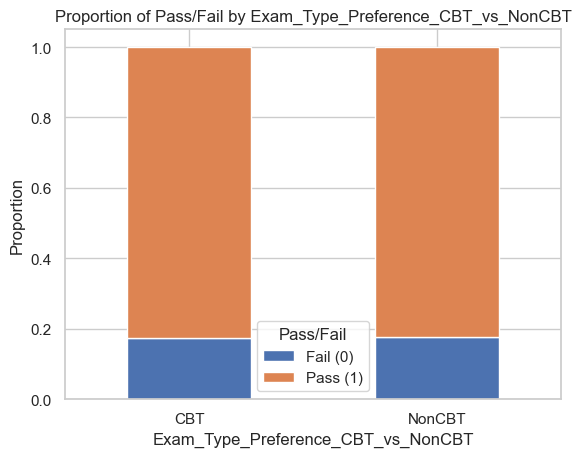

<Figure size 1000x600 with 0 Axes>

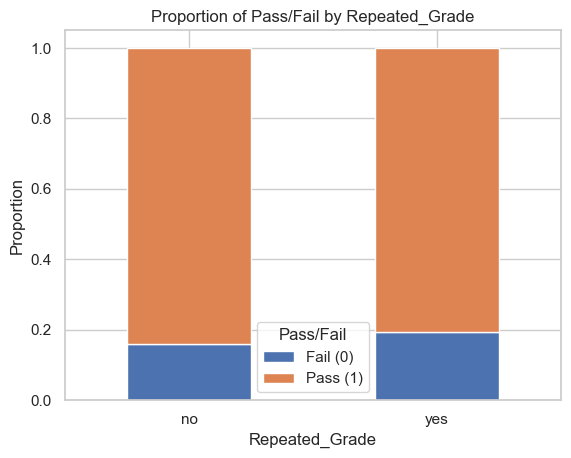

<Figure size 1000x600 with 0 Axes>

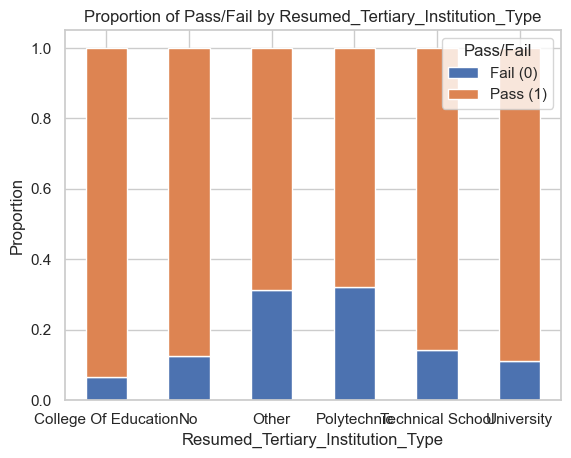

<Figure size 1000x600 with 0 Axes>

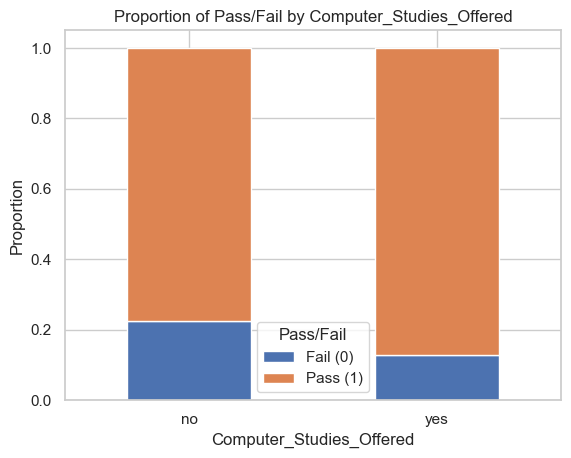

<Figure size 1000x600 with 0 Axes>

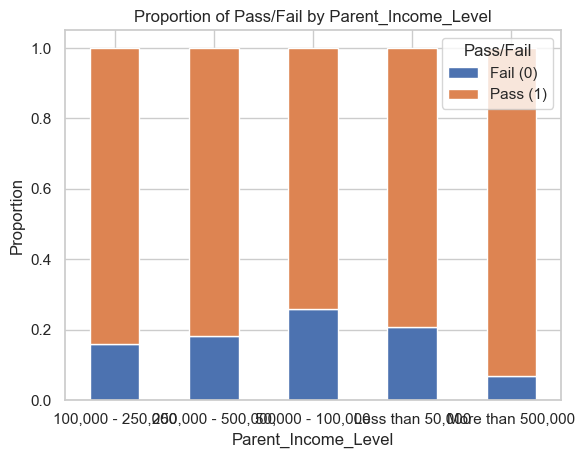

In [131]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'graduate' DataFrame is already loaded

# Categorical variables to analyze
categorical_vars = ['Parent_Education_Level',
                    'PreJAMB_CBT_Test', 'Exam_Type_Preference_CBT_vs_NonCBT'
                    , 'Repeated_Grade', 'Resumed_Tertiary_Institution_Type',
                    'Computer_Studies_Offered', 'Parent_Income_Level'
]

# Loop through each categorical variable to create stacked bar plots
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    
    # Create a cross-tabulation
    crosstab = pd.crosstab(graduate[var], graduate['Pass_Fail'])
    
    # Normalize the values to get proportions
    proportions = crosstab.div(crosstab.sum(axis=1), axis=0)
    
    # Plot the stacked bar chart
    proportions.plot(kind='bar', stacked=True)
    
    # Add labels and title
    plt.title(f'Proportion of Pass/Fail by {var}')
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)  # Rotate x labels for better visibility
    plt.legend(title='Pass/Fail', labels=['Fail (0)', 'Pass (1)'])
    
    # Show the plot
    plt.show()


AttributeError: 'int' object has no attribute 'startswith'

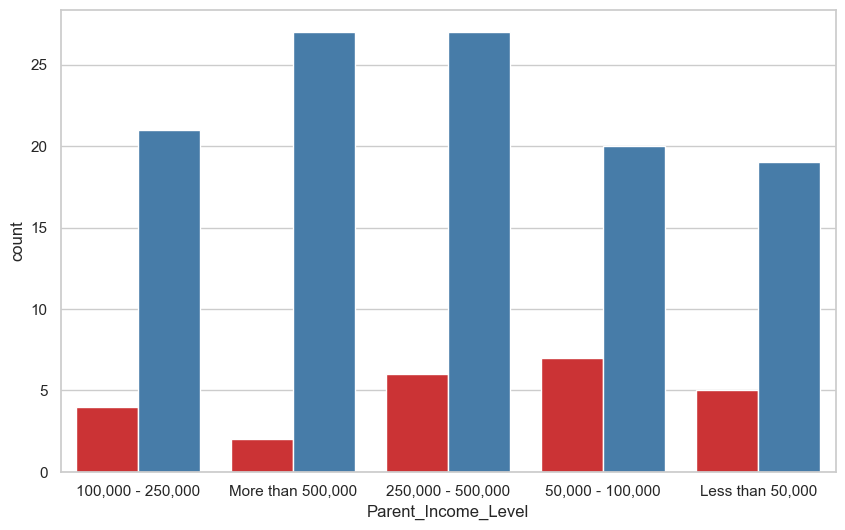

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# List of categorical variables to analyze against Pass_Fail
categorical_vars = [
    'Parent_Income_Level',
    'Residence_Type',
    'Parent_Education_Level',
    'Gadget_Ownership',
    'Guardian_Academic_Involvement',
    'Library_Access',
    'Internet_Access',
    'Study_Environment_Rating',
    'Private_Tutor_Access',
    'Prefect_Status',
    'Teacher_Availability',
    'Extracurricular_Participation',
    'Extracurricular_Activity_Club'
]

# Iterate over categorical variables and plot
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=graduate, x=var, hue='Pass_Fail', palette='Set1')
    plt.title(f'Distribution of {var} by Pass/Fail')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Pass/Fail', labels=['Fail (0)', 'Pass (1)'])
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


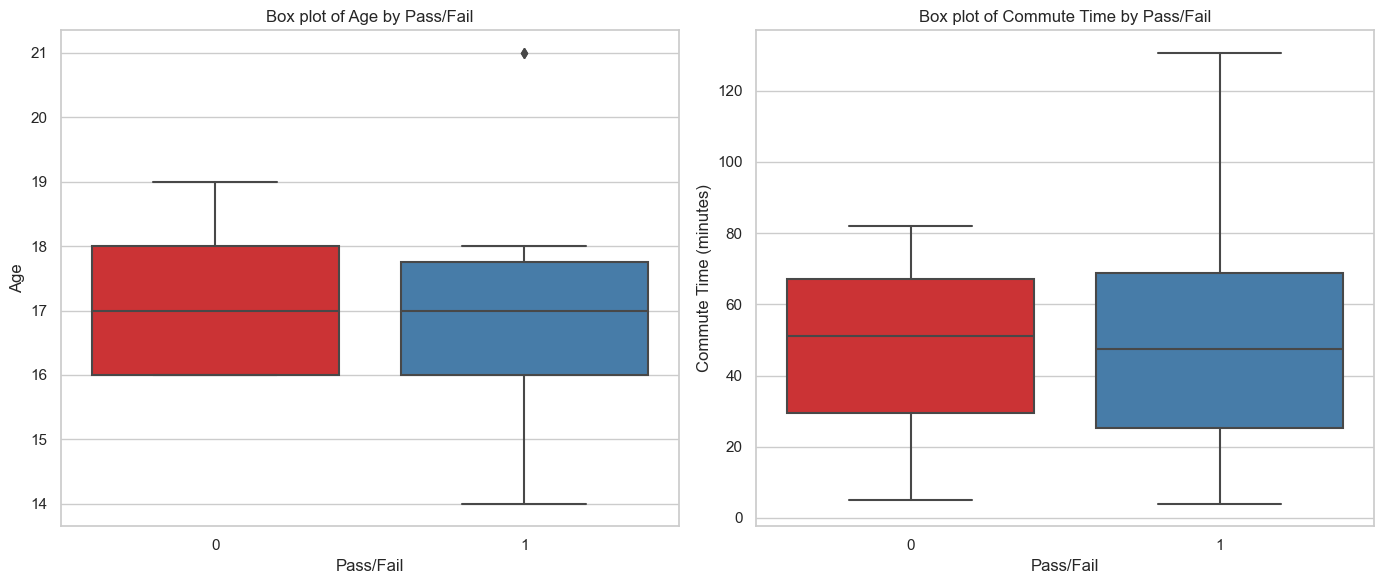

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for Age and Commute_Time
plt.figure(figsize=(14, 6))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(data=graduate, x='Pass_Fail', y='Age', palette='Set1')
plt.title('Box plot of Age by Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Age')

# Box plot for Commute_Time
plt.subplot(1, 2, 2)
sns.boxplot(data=graduate, x='Pass_Fail', y='Commute_Time', palette='Set1')
plt.title('Box plot of Commute Time by Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Commute Time (minutes)')

plt.tight_layout()
plt.show()


In [139]:
graduate['Age'].unique()

array([18, 16, 17, 15, 23, 14, 19, 22], dtype=int64)

In [141]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in Age and Commute_Time
age_outliers = detect_outliers_iqr(graduate, 'Age')
commute_time_outliers = detect_outliers_iqr(graduate, 'Commute_Time')

print(f'Outliers in Age:\n{age_outliers}')
print(f'Outliers in Commute Time:\n{commute_time_outliers}')


Outliers in Age:
              Timestamp  Age Gender Class_Study Residence_Type  Commute_Time  \
122 2024-10-03 11:29:40   23   Male         Art          Urban           5.0   
135 2024-10-03 18:54:33   22   Male  Commercial         Suburb          30.0   

    Parent_Income_Level  Sibling_Count Parent_Education_Level  \
122    Less than 50,000              4                   None   
135    Less than 50,000              7      Primary education   

    Gadget_Ownership  ... School_Motivation Resumed_Tertiary_Institution_Type  \
122             None  ...     determination                        University   
135             None  ...     determination                        University   

    Admission_Chance_with_JAMB_Score JAMB_Influence_on_Institution_Change  \
122                              yes                                  yes   
135                               no                                   no   

    Used_Two_Results_for_Admission JAMB_Score NECO_Result  \
122      

In [145]:
import pandas as pd

# Function to detect outliers using IQR and return the IQR bounds
def calculate_iqr_bounds(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate bounds for Age and Commute_Time
age_lower_bound, age_upper_bound = calculate_iqr_bounds(graduate, 'Age')
commute_lower_bound, commute_upper_bound = calculate_iqr_bounds(graduate, 'Commute_Time')

# Cap the outliers in Age and Commute_Time
graduate['Age'] = graduate['Age'].clip(lower=age_lower_bound, upper=age_upper_bound)
graduate['Commute_Time'] = graduate['Commute_Time'].clip(lower=commute_lower_bound, upper=commute_upper_bound)

# Verify the capping by checking for remaining outliers
age_outliers_capped = detect_outliers_iqr(graduate, 'Age')
commute_time_outliers_capped = detect_outliers_iqr(graduate, 'Commute_Time')

print(f'Outliers in Age after capping:\n{age_outliers_capped}')
print(f'Outliers in Commute Time after capping:\n{commute_time_outliers_capped}')


Outliers in Age after capping:
Empty DataFrame
Columns: [Timestamp, Age, Gender, Class_Study, Residence_Type, Commute_Time, Parent_Income_Level, Sibling_Count, Parent_Education_Level, Gadget_Ownership, Guardian_Academic_Involvement, Library_Access, Internet_Access, Study_Environment_Rating, Computer_Studies_Offered, Private_Tutor_Access, Prefect_Status, Teacher_Availability, Extracurricular_Participation, Extracurricular_Activity_Club, PreJAMB_CBT_Test, Exam_Type_Preference_CBT_vs_NonCBT, Repeated_Grade, Study_Hours_Per_Day, Exam_Preparation_Challenges, Exam_Confidence, School_Motivation, Resumed_Tertiary_Institution_Type, Admission_Chance_with_JAMB_Score, JAMB_Influence_on_Institution_Change, Used_Two_Results_for_Admission, JAMB_Score, NECO_Result, WAEC_Result, Career_Path_Interest, Pass_Fail]
Index: []

[0 rows x 36 columns]
Outliers in Commute Time after capping:
Empty DataFrame
Columns: [Timestamp, Age, Gender, Class_Study, Residence_Type, Commute_Time, Parent_Income_Level, Sibling

C:\Users\DELL\AppData\Local\Temp\ipykernel_27708\2980023697.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduate['Age'] = graduate['Age'].clip(lower=age_lower_bound, upper=age_upper_bound)
C:\Users\DELL\AppData\Local\Temp\ipykernel_27708\2980023697.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduate['Commute_Time'] = graduate['Commute_Time'].clip(lower=commute_lower_bound, upper=commute_upper_bound)


In [143]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in Age and Commute_Time
age_outliers = detect_outliers_iqr(school, 'Age')
commute_time_outliers = detect_outliers_iqr(school, 'Commute_Time')

print(f'Outliers in Age:\n{age_outliers}')
print(f'Outliers in Commute Time:\n{commute_time_outliers}')


Outliers in Age:
              Timestamp  Age  Gender Class_Study Residence_Type  Commute_Time  \
100 2024-10-02 13:55:47   24    Male     Science          Urban            20   
105 2024-10-03 08:36:32   21  Female     Science          Urban             5   

    Parent_Income_Level  Sibling_Count Parent_Education_Level  \
100   100,000 - 250,000              4     Tertiary education   
105   250,000 - 500,000              6     Tertiary education   

    Gadget_Ownership  ... Extracurricular_Participation  \
100            Phone  ...                           yes   
105            Phone  ...                           yes   

    Extracurricular_Activity_Club PreJAMB_CBT_Test Repeated_Grade  \
100                        sports              yes             no   
105                     red cross              yes             no   

    Study_Hours_Per_Day Exam_Preparation_Challenges     Exam_Confidence  \
100                   6           Lack of resources  Somewhat confident   
105    

In [147]:
import pandas as pd

# Function to detect outliers using IQR and return the IQR bounds
def calculate_iqr_bounds(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    lower_bound, upper_bound = calculate_iqr_bounds(data, column)
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Calculate bounds for Age
age_lower_bound, age_upper_bound = calculate_iqr_bounds(school, 'Age')

# Cap the outliers in Age
school['Age'] = school['Age'].clip(lower=age_lower_bound, upper=age_upper_bound)

# Verify the capping by checking for remaining outliers in Age
age_outliers_capped = detect_outliers_iqr(school, 'Age')

print(f'Outliers in Age after capping:\n{age_outliers_capped}')


Outliers in Age after capping:
Empty DataFrame
Columns: [Timestamp, Age, Gender, Class_Study, Residence_Type, Commute_Time, Parent_Income_Level, Sibling_Count, Parent_Education_Level, Gadget_Ownership, Guardian_Academic_Involvement, Library_Access, Internet_Access, Study_Environment_Rating, Computer_Studies_Offered, Private_Tutor_Access, Prefect_Status, Teacher_Availability, Extracurricular_Participation, Extracurricular_Activity_Club, PreJAMB_CBT_Test, Repeated_Grade, Study_Hours_Per_Day, Exam_Preparation_Challenges, Exam_Confidence, Career_Path_Interest, Higher_Education_Plan, School_Motivation]
Index: []

[0 rows x 28 columns]


In [151]:
school.isna().sum()

Timestamp                        0
Age                              0
Gender                           0
Class_Study                      0
Residence_Type                   0
Commute_Time                     0
Parent_Income_Level              0
Sibling_Count                    0
Parent_Education_Level           0
Gadget_Ownership                 0
Guardian_Academic_Involvement    0
Library_Access                   0
Internet_Access                  0
Study_Environment_Rating         0
Computer_Studies_Offered         0
Private_Tutor_Access             0
Prefect_Status                   0
Teacher_Availability             0
Extracurricular_Participation    0
Extracurricular_Activity_Club    0
PreJAMB_CBT_Test                 0
Repeated_Grade                   0
Study_Hours_Per_Day              0
Exam_Preparation_Challenges      0
Exam_Confidence                  0
Career_Path_Interest             0
Higher_Education_Plan            0
School_Motivation                0
dtype: int64

In [155]:
graduate['Age'].unique()

array([18, 16, 17, 15, 21, 14, 19], dtype=int64)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


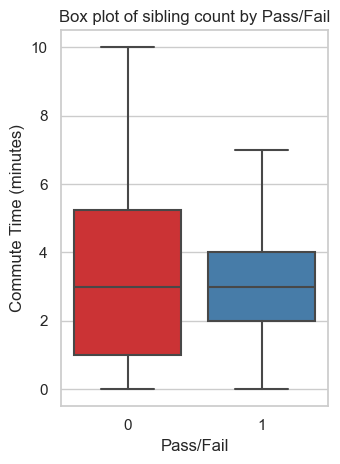

In [161]:
# Box plot for Commute_Time
plt.subplot(1, 2, 2)
sns.boxplot(data=graduate, x='Pass_Fail', y='Sibling_Count', palette='Set1')
plt.title('Box plot of sibling count by Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Commute Time (minutes)')

plt.tight_layout()
plt.show()


In [163]:
# Dropping specified columns from both DataFrames
columns_to_drop = ['Timestamp', 'Internet_Access', 'Extracurricular_Activity_Club']

# Drop columns from graduate DataFrame
graduate = graduate.drop(columns=columns_to_drop, errors='ignore')

# Drop columns from school DataFrame
school = school.drop(columns=columns_to_drop, errors='ignore')

In [165]:
# Assuming 'graduate' DataFrame already exists
# Mapping values in Gadget_Ownership
graduate['Gadget_Ownership'] = graduate['Gadget_Ownership'].map(
    {'Other': 'Yes', 'Tablet': 'Yes', 'Laptop': 'Yes', 'Phone': 'Yes', None: 'None'}
)

# Check the updated column
graduate['Gadget_Ownership'].unique()


array(['Yes', nan], dtype=object)

In [173]:
graduate['Gadget_Ownership'] = graduate['Gadget_Ownership'].fillna('None')


In [175]:
graduate['Gadget_Ownership'].unique()

array(['Yes', 'None'], dtype=object)

In [177]:
graduate.isna().sum()

Age                                     0
Gender                                  0
Class_Study                             0
Residence_Type                          0
Commute_Time                            0
Parent_Income_Level                     0
Sibling_Count                           0
Parent_Education_Level                  0
Gadget_Ownership                        0
Guardian_Academic_Involvement           0
Library_Access                          0
Study_Environment_Rating                0
Computer_Studies_Offered                0
Private_Tutor_Access                    0
Prefect_Status                          0
Teacher_Availability                    0
Extracurricular_Participation           0
PreJAMB_CBT_Test                        0
Exam_Type_Preference_CBT_vs_NonCBT      0
Repeated_Grade                          0
Study_Hours_Per_Day                     0
Exam_Preparation_Challenges             0
Exam_Confidence                         0
School_Motivation                 

In [179]:
# Assuming 'graduate' DataFrame already exists
# Mapping values in Gadget_Ownership
school['Gadget_Ownership'] = school['Gadget_Ownership'].map(
    {'Other': 'Yes', 'Tablet': 'Yes', 'Laptop': 'Yes', 'Phone': 'Yes', None: 'None'}
)

# Check the updated column
school['Gadget_Ownership'].unique()


array(['Yes', nan], dtype=object)

In [181]:
school['Gadget_Ownership'] = school['Gadget_Ownership'].fillna('None')

In [183]:
school['Gadget_Ownership'].unique()

array(['Yes', 'None'], dtype=object)

In [185]:
unique = {column: graduate[column].unique() for column in graduate.columns}
unique

{'Age': array([18, 16, 17, 15, 21, 14, 19], dtype=int64),
 'Gender': array(['Female', 'Male'], dtype=object),
 'Class_Study': array(['Commercial', 'Science', 'Art'], dtype=object),
 'Residence_Type': array(['Suburb', 'Rural', 'Urban'], dtype=object),
 'Commute_Time': array([ 69.   ,  30.   ,  49.   ,  57.   ,  77.   ,  75.   ,  79.   ,
         89.   ,  68.   ,  87.   ,  35.   ,  55.   ,  58.   ,  76.   ,
         51.   ,  53.   ,  33.   ,  23.   ,  59.   ,  37.   ,  50.   ,
         47.   ,  63.   ,  62.   ,  86.   ,  73.   ,  41.   ,  67.   ,
         27.   ,  32.   ,  65.   ,  39.   ,  54.   ,  66.   ,  21.   ,
         45.   ,  24.   ,  42.   ,  43.   ,  25.   ,  26.   ,  56.   ,
         71.   ,  80.   ,  20.   ,  48.   ,  28.   ,  61.   ,  22.   ,
         82.   ,  38.   ,  36.   ,  44.   ,  52.   ,  84.   ,  88.   ,
         85.   ,  15.   , 120.   ,   5.   ,  10.   , 130.625,  60.   ,
          4.   ]),
 'Parent_Income_Level': array(['100,000 - 250,000', 'More than 500,000', '2

In [193]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming your data is in a DataFrame called 'graduate'

# Columns for one-hot encoding (nominal categories)
nominal_columns = [
    'Gender', 'Class_Study', 'Residence_Type', 'Gadget_Ownership',
    'Library_Access', 'Private_Tutor_Access', 'Prefect_Status',
    'Extracurricular_Participation'
]

# Columns for ordinal encoding (categories with a meaningful order)
ordinal_columns = [
    'Parent_Income_Level', 'Parent_Education_Level',
    'Guardian_Academic_Involvement', 'Study_Environment_Rating',
    'Teacher_Availability'
]

# Create a ColumnTransformer for one-hot encoding
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_transformer = ColumnTransformer(
    [('onehot', onehot, nominal_columns)],
    remainder='passthrough'
)

# Fit and transform the data
graduate_encoded = onehot_transformer.fit_transform(graduate)

# Get feature names for one-hot encoded columns
onehot_feature_names = onehot_transformer.named_transformers_['onehot'].get_feature_names_out(nominal_columns)

# Create column names for the encoded DataFrame
new_columns = onehot_feature_names.tolist() + [col for col in graduate.columns if col not in nominal_columns]

# Create the encoded DataFrame
graduate_encoded = pd.DataFrame(graduate_encoded, columns=new_columns)

# Apply ordinal encoding
label_encoder = LabelEncoder()
for col in ordinal_columns:
    graduate_encoded[col] = label_encoder.fit_transform(graduate[col])

# Custom ordinal mapping for Parent_Income_Level
income_order = ['Less than 50,000', '50,000 - 100,000', '100,000 - 250,000', '250,000 - 500,000', 'More than 500,000']
graduate_encoded['Parent_Income_Level'] = pd.Categorical(graduate['Parent_Income_Level'], categories=income_order, ordered=True).codes

# Print the first few rows of the encoded DataFrame
print(graduate_encoded.head())

# If you want to save the encoded DataFrame
# graduate_encoded.to_csv('encoded_data.csv', index=False)

  Gender_Female Gender_Male Class_Study_Art Class_Study_Commercial  \
0           1.0         0.0             0.0                    1.0   
1           1.0         0.0             0.0                    1.0   
2           0.0         1.0             0.0                    1.0   
3           0.0         1.0             0.0                    1.0   
4           1.0         0.0             0.0                    0.0   

  Class_Study_Science Residence_Type_Rural Residence_Type_Suburb  \
0                 0.0                  0.0                   1.0   
1                 0.0                  1.0                   0.0   
2                 0.0                  0.0                   1.0   
3                 0.0                  1.0                   0.0   
4                 1.0                  0.0                   1.0   

  Residence_Type_Urban Gadget_Ownership_None Gadget_Ownership_Yes  ...  \
0                  0.0                   0.0                  1.0  ...   
1                  0.0

In [195]:
graduate_encoded

,Gender_Female,Gender_Male,Class_Study_Art,Class_Study_Commercial,Class_Study_Science,Residence_Type_Rural,Residence_Type_Suburb,Residence_Type_Urban,Gadget_Ownership_None,Gadget_Ownership_Yes,...,School_Motivation,Resumed_Tertiary_Institution_Type,Admission_Chance_with_JAMB_Score,JAMB_Influence_on_Institution_Change,Used_Two_Results_for_Admission,JAMB_Score,NECO_Result,WAEC_Result,Career_Path_Interest,Pass_Fail
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,stay in school,College Of Education,no,no,no,253,I haven't received my NECO result,I haven't received my WAEC result,computer science,1
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,better future,University,yes,yes,no,236,I did not write NECO,I haven't received my WAEC result,architecture,1
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,better future,Technical School,yes,no,no,261,Fair,Good,medicine,1
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,stay in school,Polytechnic,yes,no,no,159,I haven't received my NECO result,Good,law,0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,get good grades,Polytechnic,yes,no,no,251,Excellent,Poor,business administration,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,determination,University,yes,no,no,284,Fair,Good,engineering,1
134,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,determination,University,no,no,no,200,Good,Good,economics,1
135,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,satisfy parents,University,yes,yes,no,283,I did not write NECO,Excellent,medicine,1
136,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,nothing,No,yes,yes,no,239,Fair,Good,engineering,1


In [197]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming your data is in a DataFrame called 'school'

# Columns for one-hot encoding (nominal categories)
nominal_columns = [
    'Gender', 'Class_Study', 'Residence_Type', 'Gadget_Ownership',
    'Library_Access', 'Private_Tutor_Access', 'Prefect_Status',
    'Extracurricular_Participation'
]

# Columns for ordinal encoding (categories with a meaningful order)
ordinal_columns = [
    'Parent_Income_Level', 'Parent_Education_Level',
    'Guardian_Academic_Involvement', 'Study_Environment_Rating',
    'Teacher_Availability'
]

# Create a ColumnTransformer for one-hot encoding
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_transformer = ColumnTransformer(
    [('onehot', onehot, nominal_columns)],
    remainder='passthrough'
)

# Fit and transform the data
school_encoded = onehot_transformer.fit_transform(school)

# Get feature names for one-hot encoded columns
onehot_feature_names = onehot_transformer.named_transformers_['onehot'].get_feature_names_out(nominal_columns)

# Create column names for the encoded DataFrame
new_columns = onehot_feature_names.tolist() + [col for col in school.columns if col not in nominal_columns]

# Create the encoded DataFrame
school_encoded = pd.DataFrame(school_encoded, columns=new_columns)

# Apply ordinal encoding
label_encoder = LabelEncoder()
for col in ordinal_columns:
    # Ensure you use the original 'school' DataFrame for the ordinal columns
    school_encoded[col] = label_encoder.fit_transform(school[col])

# Custom ordinal mapping for Parent_Income_Level
income_order = ['Less than 50,000', '50,000 - 100,000', '100,000 - 250,000', '250,000 - 500,000', 'More than 500,000']
school_encoded['Parent_Income_Level'] = pd.Categorical(school['Parent_Income_Level'], categories=income_order, ordered=True).codes

# Print the first few rows of the encoded DataFrame
print(school_encoded.head())

# If you want to save the encoded DataFrame
# school_encoded.to_csv('encoded_data.csv', index=False)


  Gender_Female Gender_Male Class_Study_Art Class_Study_Commercial  \
0           0.0         1.0             0.0                    0.0   
1           1.0         0.0             0.0                    0.0   
2           1.0         0.0             0.0                    0.0   
3           1.0         0.0             0.0                    1.0   
4           1.0         0.0             0.0                    1.0   

  Class_Study_Science Residence_Type_Rural Residence_Type_Suburb  \
0                 1.0                  0.0                   0.0   
1                 1.0                  1.0                   0.0   
2                 1.0                  1.0                   0.0   
3                 0.0                  0.0                   1.0   
4                 0.0                  1.0                   0.0   

  Residence_Type_Urban Gadget_Ownership_None Gadget_Ownership_Yes  ...  \
0                  1.0                   0.0                  1.0  ...   
1                  0.0

In [201]:
# Removing specified columns from graduate_encoded
columns_to_remove_graduate = [
    'Exam_Type_Preference_CBT_vs_NonCBT',
    'Resumed_Tertiary_Institution_Type',
    'Admission_Chance_with_JAMB_Score',
    'JAMB_Influence_on_Institution_Change',
    'Used_Two_Results_for_Admission',
    'JAMB_Score',
    'NECO_Result',
    'WAEC_Result'
]

# Drop the columns and create a new DataFrame
graduate_encoded_updated = graduate_encoded.drop(columns=columns_to_remove_graduate)

# Print the updated graduate_encoded DataFrame
print("Updated graduate_encoded DataFrame:")
print(graduate_encoded_updated.head())

# Removing specified column from school_encoded
column_to_remove_school = ['Higher_Education_Plan']

# Drop the column and create a new DataFrame
school_encoded_updated = school_encoded.drop(columns=column_to_remove_school)

# Print the updated school_encoded DataFrame
print("Updated school_encoded DataFrame:")
print(school_encoded_updated.head())


Updated graduate_encoded DataFrame:
  Gender_Female Gender_Male Class_Study_Art Class_Study_Commercial  \
0           1.0         0.0             0.0                    1.0   
1           1.0         0.0             0.0                    1.0   
2           0.0         1.0             0.0                    1.0   
3           0.0         1.0             0.0                    1.0   
4           1.0         0.0             0.0                    0.0   

  Class_Study_Science Residence_Type_Rural Residence_Type_Suburb  \
0                 0.0                  0.0                   1.0   
1                 0.0                  1.0                   0.0   
2                 0.0                  0.0                   1.0   
3                 0.0                  1.0                   0.0   
4                 1.0                  0.0                   1.0   

  Residence_Type_Urban Gadget_Ownership_None Gadget_Ownership_Yes  ...  \
0                  0.0                   0.0                

In [203]:
# Define the columns to remove
columns_to_remove_both = ['Career_Path_Interest', 'School_Motivation']

# Remove specified columns from graduate_encoded_updated
graduate_encoded_updated = graduate_encoded_updated.drop(columns=columns_to_remove_both)

# Print the updated graduate_encoded_updated DataFrame
print("Updated graduate_encoded_updated DataFrame:")
print(graduate_encoded_updated.head())

# Remove specified columns from school_encoded_updated
school_encoded_updated = school_encoded_updated.drop(columns=columns_to_remove_both)

# Print the updated school_encoded_updated DataFrame
print("Updated school_encoded_updated DataFrame:")
print(school_encoded_updated.head())


Updated graduate_encoded_updated DataFrame:
  Gender_Female Gender_Male Class_Study_Art Class_Study_Commercial  \
0           1.0         0.0             0.0                    1.0   
1           1.0         0.0             0.0                    1.0   
2           0.0         1.0             0.0                    1.0   
3           0.0         1.0             0.0                    1.0   
4           1.0         0.0             0.0                    0.0   

  Class_Study_Science Residence_Type_Rural Residence_Type_Suburb  \
0                 0.0                  0.0                   1.0   
1                 0.0                  1.0                   0.0   
2                 0.0                  0.0                   1.0   
3                 0.0                  1.0                   0.0   
4                 1.0                  0.0                   1.0   

  Residence_Type_Urban Gadget_Ownership_None Gadget_Ownership_Yes  ...  \
0                  0.0                   0.0        

In [205]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming your data is in a DataFrame called 'graduate_encoded_updated'

# Columns for one-hot encoding
nominal_columns = ['Repeated_Grade', 'PreJAMB_CBT_Test', 'Exam_Preparation_Challenges']

# Column for ordinal encoding
ordinal_column = ['Exam_Confidence']

# Create a ColumnTransformer for one-hot encoding
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ct = ColumnTransformer(
    [('onehot', onehot, nominal_columns)],
    remainder='passthrough'
)

# Select only the columns we want to encode
columns_to_encode = nominal_columns + ordinal_column
subset_df = graduate_encoded_updated[columns_to_encode]

# Fit and transform the data
encoded_data = ct.fit_transform(subset_df)

# Get feature names for one-hot encoded columns
onehot_feature_names = ct.named_transformers_['onehot'].get_feature_names_out(nominal_columns)

# Create column names for the encoded DataFrame
new_columns = onehot_feature_names.tolist() + ordinal_column

# Create the encoded DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=new_columns, index=graduate_encoded_updated.index)

# Apply ordinal encoding for Exam_Confidence
confidence_order = ['Not confident', 'Somewhat confident', 'Very confident']
encoded_df['Exam_Confidence'] = pd.Categorical(subset_df['Exam_Confidence'], categories=confidence_order, ordered=True).codes

# Combine the encoded columns with the original DataFrame
graduate_encoded_again = pd.concat([graduate_encoded_updated.drop(columns=columns_to_encode), encoded_df], axis=1)

# Print the first few rows of the encoded DataFrame
print(graduate_encoded_again.head())

# If you want to save the encoded DataFrame
# graduate_encoded.to_csv('encoded_data.csv', index=False)


  Gender_Female Gender_Male Class_Study_Art Class_Study_Commercial  \
0           1.0         0.0             0.0                    1.0   
1           1.0         0.0             0.0                    1.0   
2           0.0         1.0             0.0                    1.0   
3           0.0         1.0             0.0                    1.0   
4           1.0         0.0             0.0                    0.0   

  Class_Study_Science Residence_Type_Rural Residence_Type_Suburb  \
0                 0.0                  0.0                   1.0   
1                 0.0                  1.0                   0.0   
2                 0.0                  0.0                   1.0   
3                 0.0                  1.0                   0.0   
4                 1.0                  0.0                   1.0   

  Residence_Type_Urban Gadget_Ownership_None Gadget_Ownership_Yes  ...  \
0                  0.0                   0.0                  1.0  ...   
1                  0.0

In [207]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming your data is in a DataFrame called 'school_encoded_updated'

# Columns for one-hot encoding
nominal_columns = ['Repeated_Grade', 'PreJAMB_CBT_Test', 'Exam_Preparation_Challenges']

# Column for ordinal encoding
ordinal_column = ['Exam_Confidence']

# Create a ColumnTransformer for one-hot encoding
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ct = ColumnTransformer(
    [('onehot', onehot, nominal_columns)],
    remainder='passthrough'
)

# Select only the columns we want to encode
columns_to_encode = nominal_columns + ordinal_column
subset_df = school_encoded_updated[columns_to_encode]

# Fit and transform the data
encoded_data = ct.fit_transform(subset_df)

# Get feature names for one-hot encoded columns
onehot_feature_names = ct.named_transformers_['onehot'].get_feature_names_out(nominal_columns)

# Create column names for the encoded DataFrame
new_columns = onehot_feature_names.tolist() + ordinal_column

# Create the encoded DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=new_columns, index=school_encoded_updated.index)

# Apply ordinal encoding for Exam_Confidence
confidence_order = ['Not confident', 'Somewhat confident', 'Very confident']
encoded_df['Exam_Confidence'] = pd.Categorical(subset_df['Exam_Confidence'], categories=confidence_order, ordered=True).codes

# Combine the encoded columns with the original DataFrame
school_encoded_again = pd.concat([school_encoded_updated.drop(columns=columns_to_encode), encoded_df], axis=1)

# Print the first few rows of the encoded DataFrame
print(school_encoded_again.head())

# If you want to save the encoded DataFrame
# school_encoded_again.to_csv('encoded_data.csv', index=False)


  Gender_Female Gender_Male Class_Study_Art Class_Study_Commercial  \
0           0.0         1.0             0.0                    0.0   
1           1.0         0.0             0.0                    0.0   
2           1.0         0.0             0.0                    0.0   
3           1.0         0.0             0.0                    1.0   
4           1.0         0.0             0.0                    1.0   

  Class_Study_Science Residence_Type_Rural Residence_Type_Suburb  \
0                 1.0                  0.0                   0.0   
1                 1.0                  1.0                   0.0   
2                 1.0                  1.0                   0.0   
3                 0.0                  0.0                   1.0   
4                 0.0                  1.0                   0.0   

  Residence_Type_Urban Gadget_Ownership_None Gadget_Ownership_Yes  ...  \
0                  1.0                   0.0                  1.0  ...   
1                  0.0

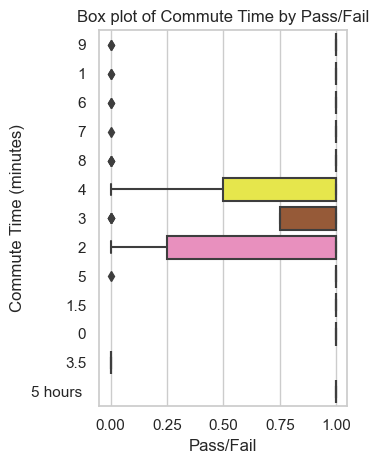

In [211]:
# Box plot for Commute_Time
plt.subplot(1, 2, 2)
sns.boxplot(data=graduate_encoded_again, x='Pass_Fail', y='Study_Hours_Per_Day', palette='Set1')
plt.title('Box plot of Commute Time by Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Commute Time (minutes)')

plt.tight_layout()
plt.show()


In [221]:
graduate_encoded_again['Study_Hours_Per_Day'].unique()

array(['9', '1', '6', '7', '8', '4', '3', '2', '5', '1.5', '0', '3.5'],
      dtype=object)

In [219]:
# Cleaning the Study_Hours_Per_Day column
graduate_encoded_again['Study_Hours_Per_Day'] = graduate_encoded_again['Study_Hours_Per_Day'].astype(str).str.replace(' hours', '').str.strip()


In [229]:
graduate_encoded_again['Computer_Studies_Offered'].unique()

array(['no', 'yes'], dtype=object)

In [223]:
graduate_encoded_again.dtypes

Gender_Female                                            object
Gender_Male                                              object
Class_Study_Art                                          object
Class_Study_Commercial                                   object
Class_Study_Science                                      object
Residence_Type_Rural                                     object
Residence_Type_Suburb                                    object
Residence_Type_Urban                                     object
Gadget_Ownership_None                                    object
Gadget_Ownership_Yes                                     object
Library_Access_no                                        object
Library_Access_yes                                       object
Private_Tutor_Access_no                                  object
Private_Tutor_Access_yes                                 object
Prefect_Status_no                                        object
Prefect_Status_yes                      

In [233]:
import pandas as pd

# Assuming your DataFrame is named 'graduate_encoded'

# Convert one-hot encoded columns to boolean
one_hot_columns = [col for col in graduate_encoded.columns if any(col.startswith(prefix) for prefix in 
                   ['Gender_', 'Class_Study_', 'Residence_Type_', 'Gadget_Ownership_', 'Library_Access_', 
                    'Private_Tutor_Access_', 'Prefect_Status_', 'Extracurricular_Participation_', 
                    'Repeated_Grade_', 'PreJAMB_CBT_Test_', 'Exam_Preparation_Challenges_'])]

graduate_encoded_again[one_hot_columns] = graduate_encoded_again[one_hot_columns].astype(bool)

# Convert numeric columns
graduate_encoded['Age'] = pd.to_numeric(graduate_encoded['Age'], errors='coerce').astype('Int64')
graduate_encoded['Commute_Time'] = pd.to_numeric(graduate_encoded['Commute_Time'], errors='coerce').astype(float)
graduate_encoded['Sibling_Count'] = pd.to_numeric(graduate_encoded['Sibling_Count'], errors='coerce').astype('Int64')
graduate_encoded['Study_Hours_Per_Day'] = pd.to_numeric(graduate_encoded['Study_Hours_Per_Day'], errors='coerce').astype(float)

# Print the updated datatypes
print(graduate_encoded_again.dtypes)

Gender_Female                                              bool
Gender_Male                                                bool
Class_Study_Art                                            bool
Class_Study_Commercial                                     bool
Class_Study_Science                                        bool
Residence_Type_Rural                                       bool
Residence_Type_Suburb                                      bool
Residence_Type_Urban                                       bool
Gadget_Ownership_None                                      bool
Gadget_Ownership_Yes                                       bool
Library_Access_no                                          bool
Library_Access_yes                                         bool
Private_Tutor_Access_no                                    bool
Private_Tutor_Access_yes                                   bool
Prefect_Status_no                                          bool
Prefect_Status_yes                      

In [235]:
graduate_encoded_again['Age'].unique()

array([18, 16, 17, 15, 21, 14, 19], dtype=object)

In [237]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'graduate_encoded_again'

# Convert remaining one-hot encoded columns to boolean
one_hot_columns = [
    'Repeated_Grade_no', 'Repeated_Grade_yes', 'PreJAMB_CBT_Test_no', 'PreJAMB_CBT_Test_yes',
    'Exam_Preparation_Challenges_Health issues', 'Exam_Preparation_Challenges_Lack of resources',
    'Exam_Preparation_Challenges_Lack of teacher support', 'Exam_Preparation_Challenges_Other',
    'Exam_Preparation_Challenges_Poor learning environment', 'Exam_Preparation_Challenges_Too many distractions'
]

# Convert one-hot encoded columns to boolean
graduate_encoded_again[one_hot_columns] = graduate_encoded_again[one_hot_columns].astype(bool)

# Convert numeric columns for graduate_encoded_again
graduate_encoded_again['Age'] = pd.to_numeric(graduate_encoded_again['Age'], errors='coerce').astype('Int64')
graduate_encoded_again['Commute_Time'] = pd.to_numeric(graduate_encoded_again['Commute_Time'], errors='coerce').astype(float)
graduate_encoded_again['Sibling_Count'] = pd.to_numeric(graduate_encoded_again['Sibling_Count'], errors='coerce').astype('Int64')
graduate_encoded_again['Study_Hours_Per_Day'] = pd.to_numeric(graduate_encoded_again['Study_Hours_Per_Day'], errors='coerce').astype(float)

# Convert binary columns for graduate_encoded_again
graduate_encoded_again['Computer_Studies_Offered'] = graduate_encoded_again['Computer_Studies_Offered'].map({'yes': 1, 'no': 0})
graduate_encoded_again['Computer_Studies_Offered'] = graduate_encoded_again['Computer_Studies_Offered'].astype(bool)

# Print the updated datatypes for graduate_encoded_again
print(graduate_encoded_again.dtypes)

# Print unique values for columns that might have issues in graduate_encoded_again
for col in ['Age', 'Commute_Time', 'Sibling_Count', 'Study_Hours_Per_Day', 'Computer_Studies_Offered', 'Pass_Fail']:
    print(f"\nUnique values in {col}:")
    print(graduate_encoded_again[col].unique())


Gender_Female                                               bool
Gender_Male                                                 bool
Class_Study_Art                                             bool
Class_Study_Commercial                                      bool
Class_Study_Science                                         bool
Residence_Type_Rural                                        bool
Residence_Type_Suburb                                       bool
Residence_Type_Urban                                        bool
Gadget_Ownership_None                                       bool
Gadget_Ownership_Yes                                        bool
Library_Access_no                                           bool
Library_Access_yes                                          bool
Private_Tutor_Access_no                                     bool
Private_Tutor_Access_yes                                    bool
Prefect_Status_no                                           bool
Prefect_Status_yes       

In [239]:
graduate_encoded_again['Pass_Fail'] = graduate_encoded_again['Pass_Fail'].astype(bool)


In [241]:
graduate_encoded_again.dtypes

Gender_Female                                               bool
Gender_Male                                                 bool
Class_Study_Art                                             bool
Class_Study_Commercial                                      bool
Class_Study_Science                                         bool
Residence_Type_Rural                                        bool
Residence_Type_Suburb                                       bool
Residence_Type_Urban                                        bool
Gadget_Ownership_None                                       bool
Gadget_Ownership_Yes                                        bool
Library_Access_no                                           bool
Library_Access_yes                                          bool
Private_Tutor_Access_no                                     bool
Private_Tutor_Access_yes                                    bool
Prefect_Status_no                                           bool
Prefect_Status_yes       

In [243]:
import pandas as pd

# Assuming your DataFrame is named 'school_encoded_again'

# Convert one-hot encoded columns to boolean
one_hot_columns = [col for col in school_encoded_again.columns if any(col.startswith(prefix) for prefix in 
                   ['Gender_', 'Class_Study_', 'Residence_Type_', 'Gadget_Ownership_', 'Library_Access_', 
                    'Private_Tutor_Access_', 'Prefect_Status_', 'Extracurricular_Participation_', 
                    'Repeated_Grade_', 'PreJAMB_CBT_Test_', 'Exam_Preparation_Challenges_'])]

# Convert to boolean
school_encoded_again[one_hot_columns] = school_encoded_again[one_hot_columns].astype(bool)

# Convert numeric columns for 'school_encoded_again'
school_encoded_again['Age'] = pd.to_numeric(school_encoded_again['Age'], errors='coerce').astype('Int64')
school_encoded_again['Commute_Time'] = pd.to_numeric(school_encoded_again['Commute_Time'], errors='coerce').astype(float)
school_encoded_again['Sibling_Count'] = pd.to_numeric(school_encoded_again['Sibling_Count'], errors='coerce').astype('Int64')
school_encoded_again['Study_Hours_Per_Day'] = pd.to_numeric(school_encoded_again['Study_Hours_Per_Day'], errors='coerce').astype(float)

# Print the updated datatypes for school_encoded_again
print(school_encoded_again.dtypes)




Gender_Female                                               bool
Gender_Male                                                 bool
Class_Study_Art                                             bool
Class_Study_Commercial                                      bool
Class_Study_Science                                         bool
Residence_Type_Rural                                        bool
Residence_Type_Suburb                                       bool
Residence_Type_Urban                                        bool
Gadget_Ownership_None                                       bool
Gadget_Ownership_Yes                                        bool
Library_Access_no                                           bool
Library_Access_yes                                          bool
Private_Tutor_Access_no                                     bool
Private_Tutor_Access_yes                                    bool
Prefect_Status_no                                           bool
Prefect_Status_yes       

In [245]:
# Convert binary columns for graduate_encoded_again
school_encoded_again['Computer_Studies_Offered'] = school_encoded_again['Computer_Studies_Offered'].map({'yes': 1, 'no': 0})
school_encoded_again['Computer_Studies_Offered'] = school_encoded_again['Computer_Studies_Offered'].astype(bool)

In [247]:
school_encoded_again.dtypes

Gender_Female                                               bool
Gender_Male                                                 bool
Class_Study_Art                                             bool
Class_Study_Commercial                                      bool
Class_Study_Science                                         bool
Residence_Type_Rural                                        bool
Residence_Type_Suburb                                       bool
Residence_Type_Urban                                        bool
Gadget_Ownership_None                                       bool
Gadget_Ownership_Yes                                        bool
Library_Access_no                                           bool
Library_Access_yes                                          bool
Private_Tutor_Access_no                                     bool
Private_Tutor_Access_yes                                    bool
Prefect_Status_no                                           bool
Prefect_Status_yes       

In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'school_encoded_again'
# Define features (X) and target (y)
X = graduate_encoded_again.drop('Pass_Fail', axis=1)  # Features
y = graduate_encoded_again['Pass_Fail']  # Target variable

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [253]:
# Identify columns for MinMaxScaler
minmax_columns = ['Age', 'Sibling_Count', 'Study_Hours_Per_Day']

# Identify column for StandardScaler
standard_column = ['Commute_Time']

# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler
X_train[minmax_columns] = minmax_scaler.fit_transform(X_train[minmax_columns])
X_test[minmax_columns] = minmax_scaler.transform(X_test[minmax_columns])

# Apply StandardScaler
X_train[standard_column] = standard_scaler.fit_transform(X_train[standard_column])
X_test[standard_column] = standard_scaler.transform(X_test[standard_column])

# Print the first few rows of the scaled training data
print("Scaled training data:")
print(X_train[minmax_columns + standard_column].head())

# Print summary statistics of the scaled features
print("\nSummary statistics of scaled features in training data:")
print(X_train[minmax_columns + standard_column].describe())


Scaled training data:
          Age  Sibling_Count  Study_Hours_Per_Day  Commute_Time
128  0.285714            0.6             0.000000     -1.109932
80   0.428571            0.5             0.444444      0.089166
43   0.428571            0.4             0.555556      0.613771
124  0.428571            0.4             0.111111     -0.735214
4    0.285714            0.2             0.666667      1.025961

Summary statistics of scaled features in training data:
              Age  Sibling_Count  Study_Hours_Per_Day  Commute_Time
count  110.000000     110.000000           110.000000  1.100000e+02
mean     0.406494       0.308182             0.494444  1.276756e-16
std      0.157430       0.212513             0.297510  1.004577e+00
min      0.000000       0.000000             0.000000 -1.709481e+00
25%      0.285714       0.200000             0.222222 -7.914218e-01
50%      0.428571       0.300000             0.444444  1.422226e-02
75%      0.571429       0.500000             0.666667  7.1681

In [257]:
# Identify columns for MinMaxScaler and StandardScaler
minmax_columns = ['Age', 'Sibling_Count', 'Study_Hours_Per_Day']
standard_column = ['Commute_Time']

# Apply MinMaxScaler (use the same scaler fitted on the training data)
school_encoded_again[minmax_columns] = minmax_scaler.transform(school_encoded_again[minmax_columns])

# Apply StandardScaler (use the same scaler fitted on the training data)
school_encoded_again[standard_column] = standard_scaler.transform(school_encoded_again[standard_column])

# Print the first few rows of the scaled "school updated again" dataset
print("Scaled 'school encoded again' data:")
print(school_encoded_again[minmax_columns + standard_column].head())

# Print summary statistics of the scaled features in the "school updated again" dataset
print("\nSummary statistics of scaled features in 'school encoded again' data:")
print(school_encoded_again[minmax_columns + standard_column].describe())


Scaled 'school encoded again' data:
        Age  Sibling_Count  Study_Hours_Per_Day  Commute_Time
0  0.000000            0.3             0.111111      0.426412
1  0.000000            0.2             0.444444     -0.360496
2  0.142857            0.4             0.888889     -0.397968
3 -0.142857            0.2             0.777778      0.801130
4 -0.142857            0.4             0.111111     -0.960045

Summary statistics of scaled features in 'school encoded again' data:
              Age  Sibling_Count  Study_Hours_Per_Day  Commute_Time
count  108.000000     108.000000           108.000000    108.000000
mean     0.133598       0.294444             0.599794      0.096105
std      0.214195       0.195191             0.275929      0.793164
min     -0.142857       0.000000             0.111111     -1.672009
25%      0.000000       0.100000             0.416667     -0.660270
50%      0.142857       0.300000             0.666667      0.126638
75%      0.285714       0.500000             

In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8214285714285714

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         5
        True       0.82      1.00      0.90        23

    accuracy                           0.82        28
   macro avg       0.41      0.50      0.45        28
weighted avg       0.67      0.82      0.74        28


Confusion Matrix:
[[ 0  5]
 [ 0 23]]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8214285714285714

Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.40      0.44         5
        True       0.88      0.91      0.89        23

    accuracy                           0.82        28
   macro avg       0.69      0.66      0.67        28
weighted avg       0.81      0.82      0.81        28


Confusion Matrix:
[[ 2  3]
 [ 2 21]]


In [265]:
# Importing XGBoost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the logistic regression model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data using logistic regression
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate logistic regression model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log_reg))

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model performance
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))


Logistic Regression Accuracy: 0.8214285714285714

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.50      0.40      0.44         5
        True       0.88      0.91      0.89        23

    accuracy                           0.82        28
   macro avg       0.69      0.66      0.67        28
weighted avg       0.81      0.82      0.81        28


Confusion Matrix (Logistic Regression):
[[ 2  3]
 [ 2 21]]

XGBoost Accuracy: 0.75

Classification Report (XGBoost):
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         5
        True       0.81      0.91      0.86        23

    accuracy                           0.75        28
   macro avg       0.40      0.46      0.43        28
weighted avg       0.66      0.75      0.70        28


Confusion Matrix (XGBoost):
[[ 0  5]
 [ 2 21]]


In [267]:
y_pred_school_updated_log_reg = log_reg.predict(school_encoded_again)


In [269]:
y_pred_school_updated_log_reg

array([False,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [271]:
school

,Age,Gender,Class_Study,Residence_Type,Commute_Time,Parent_Income_Level,Sibling_Count,Parent_Education_Level,Gadget_Ownership,Guardian_Academic_Involvement,...,Teacher_Availability,Extracurricular_Participation,PreJAMB_CBT_Test,Repeated_Grade,Study_Hours_Per_Day,Exam_Preparation_Challenges,Exam_Confidence,Career_Path_Interest,Higher_Education_Plan,School_Motivation
0,14,Male,Science,Urban,61,"Less than 50,000",3,None,Yes,Never,...,Always,yes,no,yes,1,Poor learning environment,Very confident,pharmacy,yes,stay in school
1,14,Female,Science,Rural,40,"250,000 - 500,000",2,Primary education,Yes,Always,...,Never,no,yes,no,4,Too many distractions,Very confident,engineering,no,stay in school
2,15,Female,Science,Rural,39,"More than 500,000",4,Secondary education,Yes,Sometimes,...,Never,yes,yes,no,8,Health issues,Not confident,business administration,yes,money
3,13,Female,Commercial,Suburb,71,"More than 500,000",2,Primary education,Yes,Always,...,Sometimes,yes,no,no,7,Lack of teacher support,Very confident,agriculture,yes,money
4,13,Female,Commercial,Rural,24,"250,000 - 500,000",4,Tertiary education,Yes,Never,...,Always,no,no,yes,1,Lack of resources,Very confident,law,yes,get good grades
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,16,Female,Science,Suburb,25,"250,000 - 500,000",2,Tertiary education,None,Sometimes,...,Often,no,no,no,6,Other,Somewhat confident,medicine,yes,future career goals
104,17,Female,Art,Urban,90,"More than 500,000",3,Tertiary education,Yes,Never,...,Never,yes,yes,no,4,Too many distractions,Somewhat confident,language translation and teaching,yes,satisfy parents
105,19,Female,Science,Urban,5,"250,000 - 500,000",6,Tertiary education,Yes,Sometimes,...,Often,yes,yes,no,6,Too many distractions,Very confident,medical rehabilitation,yes,my passion to learn
106,14,Female,Art,Urban,10,"More than 500,000",2,Tertiary education,Yes,Always,...,Always,yes,yes,no,6,Too many distractions,Very confident,law,yes,future career goals


In [273]:
school['Prediction'] = y_pred_school_updated_log_reg

In [275]:

# Save the updated DataFrame with predictions to a new CSV file
school.to_csv('school_updated_with_predictions.csv', index=False)

